<img src="https://imgur.com/3U3hI1u.png" width="100%" />

#### Boas vindas a sua segunda e última tarefa de Aprendizado por Reforço!

Neste exercício, você deverá implementar e comparar diferentes algoritmos de **Aprendizado por Reforço Profundo** utilizando a biblioteca _[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)_.

A _Stable Baselines_ é uma biblioteca de Aprendizado por Reforço que implementa diversos algoritmos de agentes, além de várias funcionalidades úteis para seu treinamento. Suas implementações são bem simples e intuitivas, mas sem deixarem de ser otimizadas e poderosas, buscando facilitar o desenvolvimento de projetos de reforço de alta qualidade.

Antes de começar a tarefa, é importante acessar e se familiarizar com o tutorial da biblioteca disponível neste repositório! Depois de rodar o guia, você já estará capaz de completar este trabalho.

## Escolha do Ambiente

Antes de analisar o possíveis algoritmos, o primeiro passo é escolher qual ambiente você quer resolver! Para esta tarefa, separamos dois possíveis ambientes diferentes, em ordem de dificuldade, que você poderá escolher: **CartPole** e **Pendulum**. Lembrando que, quanto mais difícil um ambiente, mais demorado será o treinamento.

A seguir, estão as descrições de cada um deles:

<h2 align="center">CartPole</h2>
<img src="https://bytepawn.com/images/cartpole.gif" width=50% />

**CartPole** é o ambiente de Aprendizado por Reforço mais comum do Gym, no qual deve-se balancear um pêndulo invertido conectado a um carrinho, somente controlando os movimentos do carrinho.

### Características do Ambiente

O **Espaço de Observação** do CartPole é definido por 4 informações:

<br>

|     | Informação                         | Min     | Max    |
| :-- | :--------------------------------- | :-----: | :----: |
| 0   | Posição do Carrinho                | -4.8    | 4.8    |
| 1   | Velocidade do Carrinho             | -Inf    | Inf    |
| 2   | Ângulo da Barra                    | -24 deg | 24 deg |
| 3   | Velocidade na Extremidade da Barra | -Inf    | Inf    |

<br>

A posição do carrinho vai de -4.8 a 4.8, mas ele perde o episódio caso saia dos limites de -2.4 e 2.4. Da mesma forma, o ângulo da barra vai de -24° a 24°, porém o episódio acaba caso a barra saia dos limites de -12° e 12°.

Já o **Espaço de Ação** é composto por duas ações únicas: mover o carrinho para a **esquerda** ou para a **direita**.

Quando queremos mover o carrinho para a esquerda, fazemos um `env.step(0)`; quando queremos movê-lo para a direita, enviamos um `env.step(1)`

| Ação | Significado           |
| :--- | :-------------------- |
| 0    | Mover para a esquerda |
| 1    | Mover para a direito  |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, que é igual a +1 para cada instante que passa sem o agente perder. Assim, o CartPole é incentivado a sobreviver por mais tempo.

Para testar o modelo, vamos precisar de 2 bibliotecas: **gym** (para inicialização dos ambientes) e **stable_baselines3** (para inicialização e avaliação dos modelos):

In [2]:
import gymnasium as gym 
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

# Definindo ambiente
env = gym.make("CartPole-v1")

# Definindo modelo
model = PPO("MlpPolicy", env, seed=1, verbose=1)

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Recompensa Média: 9.40 +/- 0.8


c:\Users\gusta\.conda\envs\base39\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


<h2 align="center">Pendulum</h2>

<img src="https://www.gymlibrary.ml/_static/videos/classic_control/pendulum.gif" width=30% />

**Pendulum** é um ambiente do Gym que simula um pêndulo pendurado por um ponto tentando se balancear de cabeça para baixo. O agente deve um torque no pêndulo de forma que ele se levante e fique parado em pé.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 8 informações.

| Estado    | Informação                                     |
| :-------- | :--------------------------------------------- |
| 0         | Posição no eixo _x_ da ponta do pêndulo        |
| 1         | Posição no eixo _y_ da ponta do pêndulo        |
| 2         | Velocidade angular do pêndulo                  |

Já o **Espaço de Ação** é um espaço **contínuo** do torque aplicado no pêndulo.

| Ação | Significado     | Intervalo   |
| :--- | :-------------- | :---------- |
| 0    | Torque          | $-2$ a $+2$ |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, que segue a seguinte equação:

$$r = -(\theta{}^2 + 0.1 * \dot{\theta}^2 + 0.001 * \tau{})$$

Desta forma, temos que a recompensa é menor quando o ângulo do pêndulo é menor (mais em pé), quando a velocidade angular é baixa, e quando usamos pouco torque.

Por ser um ambiente com espaço de ação contínuo, os algoritmos que podemos usar serão diferentes, e o treinamento pode ser mais demorado.

### Ambiente

Para criar o ambiente, basta rodar a linha de código a seguir:

In [3]:
env = gym.make("Pendulum-v1")

### Exercício 1 - Testando Modelos

Caro piloto, agora que você conhece esses dois ambientes, é hora de brincar com eles. Você deverá testar diferentes algoritmos (a seu critério), e ver sua recompensa média. Para ver quais as limitações dos modelos, veja esse [link](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html). Abaixo, criamos uma função que será útil para comparar os modelos posteriormente.

In [4]:
def getValues(model, env, n_episodes, info_dict):
    model_name = str(model.__class__).split(".")[-1][:-2]

    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    info_dict[model_name] = {}
    info_dict[model_name]["mean_reward"] = mean_reward
    info_dict[model_name]["std_reward"] = std_reward
    
    return info_dict

algorithms_dict = {}

#### Treinando e Avaliando seu próprio modelo

Primeiramente, agora você deve decidir em qual ambiente você deseja treinar seu agente. Para isto, basta tirar o comentário da linha referente ao ambiente escolhido:

In [5]:
#env_name = "CartPole-v1"
env_name = "Pendulum-v1"

Em seguida, você está livre para testar diferentes algoritmos para seu ambiente!

In [14]:
from stable_baselines3 import A2C # Importe o modelo do stable_baselines3
from stable_baselines3.common.env_util import make_vec_env

# Definindo o ambiente
env = make_vec_env(env_name)

model = A2C("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps=10_000) # Treine o modelo
n_episodes = 25 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)
print(algorithms_dict)

Using cpu device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.17e+03 |
| time/                 |           |
|    fps                | 559       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.43     |
|    explained_variance | 0.72      |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.261     |
|    std                | 1.01      |
|    value_loss         | 0.146     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.17e+03 |
| time/                 |           |
|    fps                | 558       |
|    iterations         | 200       |
|    time_elapsed       | 1      

In [ ]:
### Espaço livre para testagem de diferentes algoritmos


A seguir, detalhe um pouco mais quais foram os algoritmos testados bem como a performance obtida por cada um.

Este detalhamento pode ser feito por meio de um ou mais gráficos mostrando o desempenho dos modelos, ou simplesmente por texto.

In [10]:
### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
import os

import matplotlib.pyplot as plt

def plot_results(log_folder, window=10, title="Curva de Aprendizado"):
    """
    Plota os resultados.

    :param log_folder: (str) diretório dos resultados a serem plotados
    :param window: (int) tamanho da janela da média móvel
    :param title: (str) título do plot
    """
    # Obtém os resultados
    results = results_plotter.load_results(log_folder)
    x, y = results_plotter.ts2xy(results, "timesteps")
    
    # Calcula a média móvel do retorno
    y_smoothed = results_plotter.rolling_window(y, window=window).mean(axis=1)
    
    # Plota os resultados
    fig = plt.figure(title, figsize=(10, 5))
    plt.scatter(x, y, s=2)
    plt.plot(x[window-1:], y_smoothed, color="darkblue", label="Média Móvel")
    plt.xlabel("Timesteps")
    plt.ylabel("Retorno Médio")
    plt.title(title)
    plt.legend()
    plt.show()

Using cpu device
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.17e+03 |
| time/                 |           |
|    fps                | 538       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.43     |
|    explained_variance | 0.72      |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.261     |
|    std                | 1.01      |
|    value_loss         | 0.146     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.17e+03 |
| time/                 |           |
|    fps                | 530       |
|    iterations         | 200       

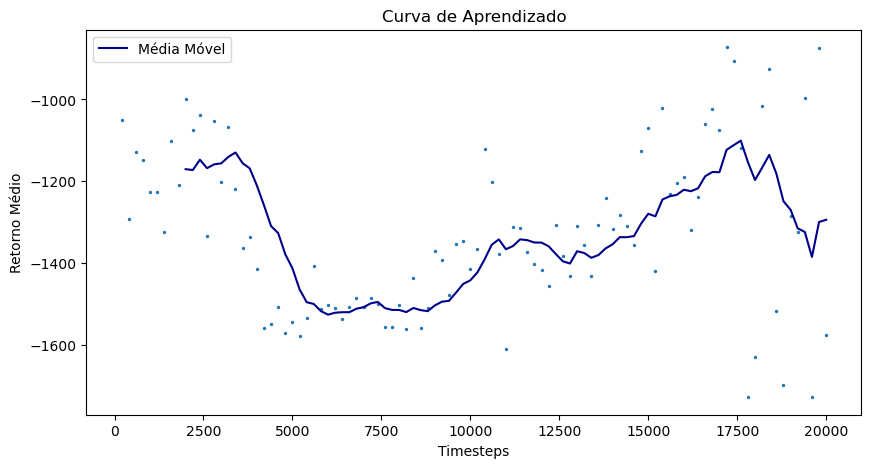

In [16]:
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make(env_name)

env = Monitor(env, log_dir)

model = A2C("MlpPolicy", env, seed=1, verbose=1).learn(total_timesteps=20_000)

plot_results(log_dir)

In [ ]:
'''import time

test_env = gym.make("Pendulum-v1", render_mode="human")
model = A2C("MlpPolicy", test_env, verbose=1).learn(total_timesteps=40000)
obs, _ = test_env.reset()
for _ in range(400):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = test_env.step(action)
    if terminated or truncated:
        break
    time.sleep(0.02)

test_env.close()
'''

NameError: name 'gym' is not defined

### Escolha do Algoritmo

Após testar e analisar diversos algoritmos diferentes, qual foi o escolhido?

_Pergunta Extra:_ você usou algum critério para escolher quais algoritmos seriam testados?

In [ ]:
### Qual foi o algoritmo escolhido?
